Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
from itertools import accumulate
from icecream import ic
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

# 0-1 Multiple Knapsack Problem

see: [https://en.wikipedia.org/wiki/Knapsack_problem](https://en.wikipedia.org/wiki/Knapsack_problem)

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [9]:
NUM_ITEMS = 1000
DIMENSIONS = 500
MAX_STEPS = 10_000

WEIGHTS = np.random.randint(1, 50 + 1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS * 20)
VALUES = np.random.randint(1, 100 + 1, size=NUM_ITEMS)

In [23]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -sum(np.sum(WEIGHTS[knapsack], axis=0) > MAX_WEIGHTS)

## Random-Mutation Hill Climber

  0%|          | 0/10000 [00:00<?, ?it/s]

ic| evaluate(solution): np.int64(36470)
ic| history.index(evaluate(solution)): 2675


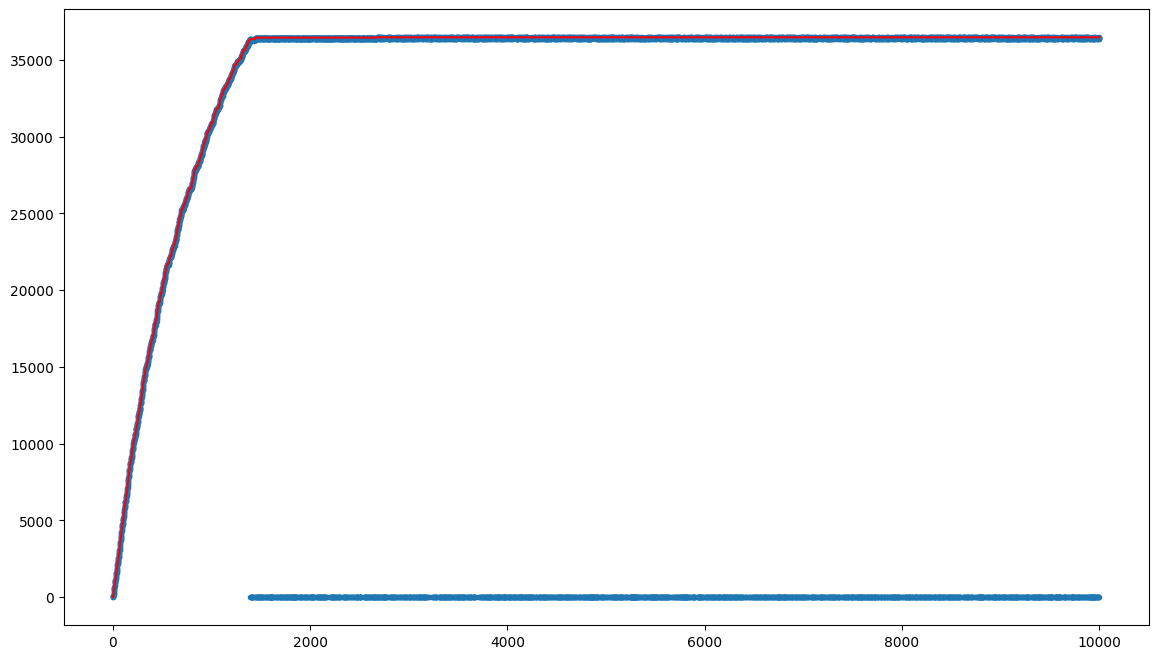

In [24]:
solution = np.full(NUM_ITEMS, False)
history = [evaluate(solution)]
for n in tqdm(range(MAX_STEPS)):
    # TWEAK!
    new_solution = solution.copy()
    index = np.random.randint(0, NUM_ITEMS)
    new_solution[index] = not new_solution[index]

    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        solution = new_solution

# That's all...
ic(evaluate(solution))
ic(history.index(evaluate(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## RMHC with a more powerful tweak

In [25]:
def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_ITEMS)
        new_solution[index] = not new_solution[index]
    return new_solution

  0%|          | 0/10000 [00:00<?, ?it/s]

ic| evaluate(solution): np.int64(41492)
ic| history.index(evaluate(solution)): 9973


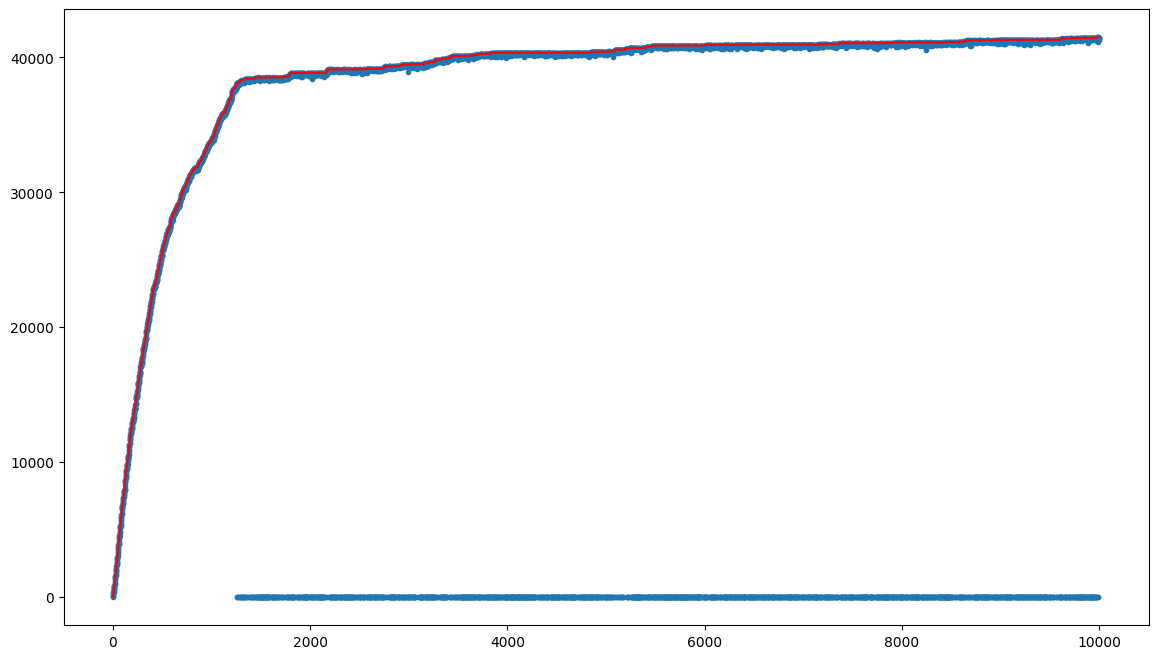

In [26]:
solution = np.full(NUM_ITEMS, False)

history = [evaluate(solution)]
for n in tqdm(range(MAX_STEPS)):
    new_solution = tweak(solution)
    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        solution = new_solution

# That's all...
ic(evaluate(solution))
ic(history.index(evaluate(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Steepest Step and Restart

In [27]:
NUM_RESTARTS = 3
STEEPEST_STEP_CANDIDATES = 3

max_value = -1
num_steps = 0
history = list()

for i in tqdm(range(0, NUM_RESTARTS), position=0, desc="Restarts"):
    solution = np.full(NUM_ITEMS, False)  # restarts the solution
    history.append(evaluate(solution))

    last_improvement = (0, 0)
    new_solution = solution

    for n in tqdm(range(1, 3000 + 1), position=1):
        # create candidate solutions and evaluate them
        candidates = [tweak(solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
        candidates_fitness = list()
        for c in candidates:
            f = evaluate(c)
            history.append(f)
            candidates_fitness.append(f)
        idx = candidates_fitness.index(max(candidates_fitness))

        # keep candidate solution that yielded the steepest ascent
        new_solution = candidates[idx]
        new_fitness = candidates_fitness[idx]
        num_steps += STEEPEST_STEP_CANDIDATES

        if new_fitness > evaluate(solution):
            # logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
            last_improvement = (i, n)
            solution = new_solution

    if evaluate(solution) > max_value:
        max_value = evaluate(solution)
        best_solution = solution

print(f"\nBest solution: {max_value} found at {last_improvement} -- total steps: {num_steps}")

Restarts:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]


Best solution: 42322 found at (2, 2928) -- total steps: 27000


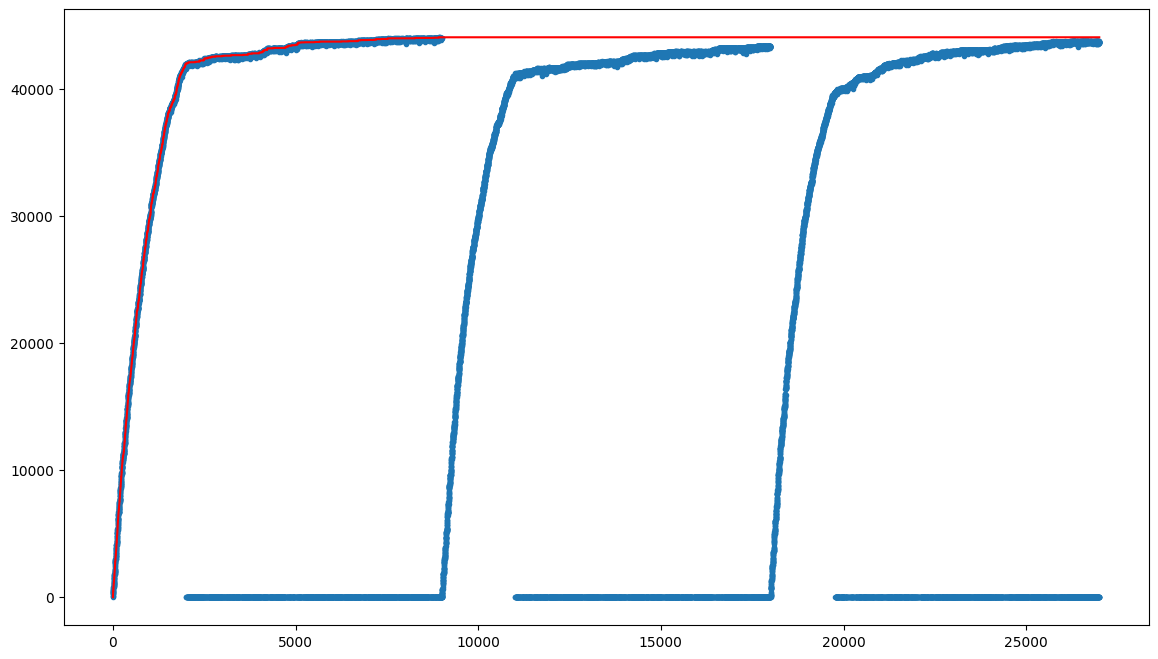

In [24]:
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    [max(history[: i + 1]) for i in range(len(history))],
    color="red",
)
plt.scatter(range(len(history)), history, marker=".")